<a href="https://colab.research.google.com/github/nureeee/DeepLearning/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%84%98%ED%8C%8C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자전거 대여량 데이터를 넘파이만 사용하여 처리하기!!
  * 발표자 : 이누리


# 진행계획
* 데이터 검토
* 가설 세우기
* 데이터 분석
* 데이터 시각화
* 결론
* 자전거 대여량 예측 모델 만들기
* 모델 평가  

## 미니 프로젝트의 목적
 * 넘파이 공부
 * 판다스의 편리함을 느끼기

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as pd

# 데이터 불러오기

* 판다스로 데이터를 불러오고 넘파이로 바꾸고 나서는 모든 작업을 **넘파이로만** 처리!!

In [ ]:
# csv파일 판다스로 불러오기
df = pd.read_csv('/content/drive/MyDrive/bike_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# 판다스 데이터 프레임을 넘파이로 바꾸기
 판다스로 불러온 DF데이터세트를 np_df의 넘파이로 불러옴

In [ ]:
np_df = np.array(df)
np_df

array([['2011-01-01 00:00:00', 1, 0, ..., 3, 13, 16],
       ['2011-01-01 01:00:00', 1, 0, ..., 8, 32, 40],
       ['2011-01-01 02:00:00', 1, 0, ..., 5, 27, 32],
       ...,
       ['2012-12-19 21:00:00', 4, 0, ..., 4, 164, 168],
       ['2012-12-19 22:00:00', 4, 0, ..., 12, 117, 129],
       ['2012-12-19 23:00:00', 4, 0, ..., 4, 84, 88]], dtype=object)

# 텍스트 시계열 데이터를 날짜데이터로 변환하기

In [ ]:
# 파이썬 내장한수 사용
from datetime import date
import datetime

In [ ]:
# 원본 데이터에서 object로 되어있는 시계열 텍스트 데이터 저장
date_time_obj = np_df[:,0]
date_time_obj

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

In [ ]:
# 날짜 텍스트를 날짜 데이터로 변환
date_list = []
for i in date_time_obj:
    a = datetime.datetime.fromisoformat(i)
    date_list.append(a)

In [ ]:
# 데이터가 잘 변환되었는지 확인하기
date_list[0].hour

0

In [ ]:
# 데이터 복사하기
df_copy = np_df.copy()
np_df.shape

(10886, 12)

In [ ]:
# 날짜 텍스트 데이터를 삭제  
df_copy = np.delete(df_copy, 0, axis=1)
df_copy

array([[1, 0, 0, ..., 3, 13, 16],
       [1, 0, 0, ..., 8, 32, 40],
       [1, 0, 0, ..., 5, 27, 32],
       ...,
       [4, 0, 1, ..., 4, 164, 168],
       [4, 0, 1, ..., 12, 117, 129],
       [4, 0, 1, ..., 4, 84, 88]], dtype=object)

In [ ]:
df_copy.shape
# 해당 데이터가 삭제된 것을 볼 수 있다.

(10886, 11)

In [ ]:
# 리스트를 넘파이로 변환
date_list = np.array(date_list)
date_list.shape

(10886,)

In [ ]:
# 2차 배열로 변환
date_list = date_list.reshape(-1, 1)
date_list.shape

(10886, 1)

In [ ]:
# 두개의 배열 합치기
data1 = np.hstack((date_list, df_copy))
data1

array([[datetime.datetime(2011, 1, 1, 0, 0), 1, 0, ..., 3, 13, 16],
       [datetime.datetime(2011, 1, 1, 1, 0), 1, 0, ..., 8, 32, 40],
       [datetime.datetime(2011, 1, 1, 2, 0), 1, 0, ..., 5, 27, 32],
       ...,
       [datetime.datetime(2012, 12, 19, 21, 0), 4, 0, ..., 4, 164, 168],
       [datetime.datetime(2012, 12, 19, 22, 0), 4, 0, ..., 12, 117, 129],
       [datetime.datetime(2012, 12, 19, 23, 0), 4, 0, ..., 4, 84, 88]],
      dtype=object)

# datetime을 years, months, days, hours, dayofweeks로 뽑아낸다.

In [ ]:
# datetime을 years, months, days, hours, dayofweeks로 추출하여 새로운 numpy 제작
years = []
months = []
days = []
hours = []
dayofweeks=[]
TIMESTAMP_IDX = 0
for data in data1:
  years.append(data[TIMESTAMP_IDX].year)
  months.append(data[TIMESTAMP_IDX].month)
  days.append(data[TIMESTAMP_IDX].day)
  hours.append(data[TIMESTAMP_IDX].hour)
  dayofweeks.append(data[TIMESTAMP_IDX].weekday())
date_ndarray = np.array([
  years, months, days, hours, dayofweeks
])
# list로 먼저 만들고 numpy로 묶음
date_ndarray

array([[2011, 2011, 2011, ..., 2012, 2012, 2012],
       [   1,    1,    1, ...,   12,   12,   12],
       [   1,    1,    1, ...,   19,   19,   19],
       [   0,    1,    2, ...,   21,   22,   23],
       [   5,    5,    5, ...,    2,    2,    2]])

In [ ]:
# 추출해온 데이터 shape 확인
date_ndarray.shape

(5, 10886)

In [ ]:
# 추출해온 데이터를 transposition
data_np = date_ndarray.T
data_np.shape

(10886, 5)

In [ ]:
data = np.hstack((data_np, df_copy))
data

array([[2011, 1, 1, ..., 3, 13, 16],
       [2011, 1, 1, ..., 8, 32, 40],
       [2011, 1, 1, ..., 5, 27, 32],
       ...,
       [2012, 12, 19, ..., 4, 164, 168],
       [2012, 12, 19, ..., 12, 117, 129],
       [2012, 12, 19, ..., 4, 84, 88]], dtype=object)

# 가설 세우기
* 날이 더운 여름이나 추운 겨울에는 비회원보다 회원의 수가 더 많을 것이다   
 
> 회원으로 등록하고 자전거를 탄다는 것은 앞으로도 자전거를 탈 계획이 있는 것이고 등록한 사람이 그렇지 않은 사람보다 날씨의 영향을 덜 받을 것이다.  

> 예를 들자면... 운동을 꾸준히 하는 사람이 있는데 날씨가 흐려도 날이 별로지만 오늘도 운동을 해야지 하고 계획에 맞춰서 나가겠지만 비회원은 날이 흐리면 다음을 기약하고 미루기 쉽다.

# 데이터 상관관계 분석

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 에러 발생
# data_cor = np.corrcoef(data)
# data_cor

In [ ]:
ate = list(data[:, 9]) # 체감온도
tem = list(data[:, 8]) # 온도
hum = list(data[:, 10]) # 습도
wor = list(data[:, 6]) # 일하는 날
hol = list(data[:, 5]) # 휴일
cou = list(data[:, -1]) # 총 이용자수
cas = list(data[:, -3]) # 비회원
reg = list(data[:, -2]) # 회원
hou = list(data[:, 3]) # 시간
mon = list(data[:, 1]) # 월

xarr = [ate, tem, hum, wor, hol, cou, cas, reg, hou, mon]
xarr = np.array(xarr)

xarr_cor = np.corrcoef(xarr) # 전체로 보는상관관계
xarr_cor

array([[ 1.00000000e+00, -5.50354182e-02,  9.84948110e-01,
         2.94603393e-04,  2.58688551e-01,  3.94453645e-01,
         4.67097064e-01,  3.18571280e-01,  1.45429670e-01,
         2.57589172e-01],
       [-5.50354182e-02,  1.00000000e+00, -5.53759732e-02,
        -7.07391151e-03,  8.87865085e-03, -1.28655201e-01,
        -1.35917680e-01, -1.09340372e-01, -2.27403355e-02,
         1.21439767e-02],
       [ 9.84948110e-01, -5.53759732e-02,  1.00000000e+00,
        -5.21477822e-03,  2.64744326e-01,  3.89784437e-01,
         4.62066536e-01,  3.14635386e-01,  1.40342550e-01,
         2.64172875e-01],
       [ 2.94603393e-04, -7.07391151e-03, -5.21477822e-03,
         1.00000000e+00,  2.93676097e-02, -5.39298448e-03,
         4.37989287e-02, -2.09556729e-02, -3.54161109e-04,
         1.73145748e-03],
       [ 2.58688551e-01,  8.87865085e-03,  2.64744326e-01,
         2.93676097e-02,  1.00000000e+00,  1.63439017e-01,
         9.67580628e-02,  1.64010534e-01, -6.54567409e-03,
         9.

## 데이터 상관관계 분석 
* 시간 데이터를 제외한 모든 데이터에서 비회원이 회원보다 상관관계가 더 크게 나타났다.
* '휴일'과 '월' 데이터에서 비회원이 회원보다 더 큰폭으로 상관관계가 나타났다.

# 데이터 시각화

넘파이로는 Seaborn을 활용한 시각화가 안된다...

In [ ]:
# years = []

# for date in data:
#     years.append(date[0].year)

# s = pd.DataFrame(pd.Series(years, name="v"))
# sns.countplot(data=s, x='v')



# figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# figure.set_size_inches(18,8)

# sns.barplot(data=data, x=data.year, y='count', ax=ax1)
# sns.barplot(data=data, x=data.month, y='count', ax=ax2)
# sns.barplot(data=data, x=[datetime.datetime].day, y='count', ax=ax3)
# sns.barplot(data=data, x=[datetime.datetime].hour, y='count', ax=ax4)

# ax1.set(ylabel='count', title='연도별 대여량')
# ax2.set(xlabel='month', title='월별 대여량')
# ax3.set(xlabel='day', title='일별 대여량')
# ax4.set(xlabel='hour', title='시간별 대여량')

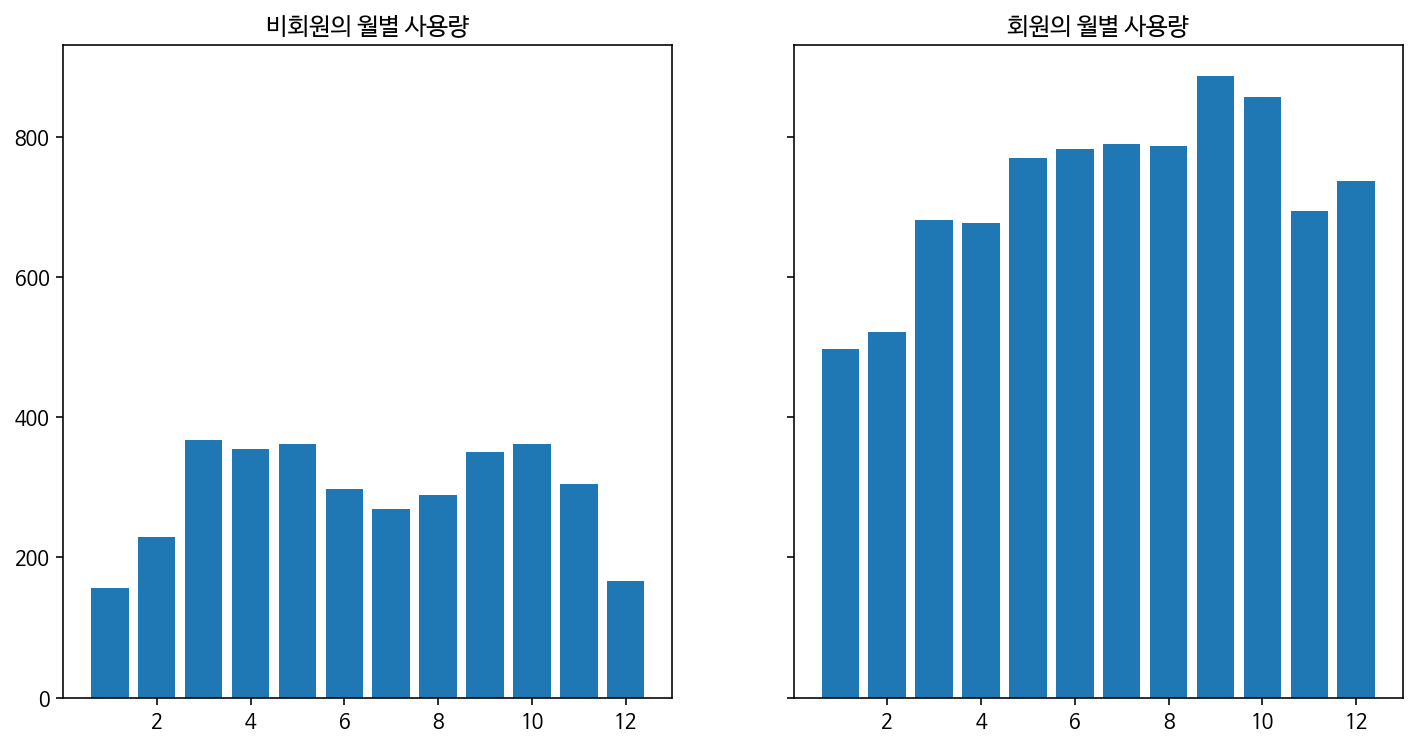

In [ ]:
# 비회원, 회원의 월별 사용량
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 1], data[:, -3])
axes[0].set_title('비회원의 월별 사용량')

axes[1].bar(data[:, 1], data[:, -2])
axes[1].set_title('회원의 월별 사용량')
plt.show()

* 비회원은 자전거 타기 좋은 봄과 가을에 사용자가 여름과 겨울에 비해 상대적으로 많다.
* 회원은 3월부터 사용량이 증가하고 여름부터 가을까지 사용량이 증가하다 겨울에 다시 사용량이 줄었다.  
* 추운 겨울에는 회원과 비회원 모두 사용자가 상대적으로 줄었다.
* 비회원의 경우 6 - 8월 에는 앞뒤 달과 비교해 사용자가 줄었지만 회원의 경우에는 3월부터 10월 까지 증가하는 추세가 보이다가 이후에 다시 줄어드는 것을 볼 수 있다.


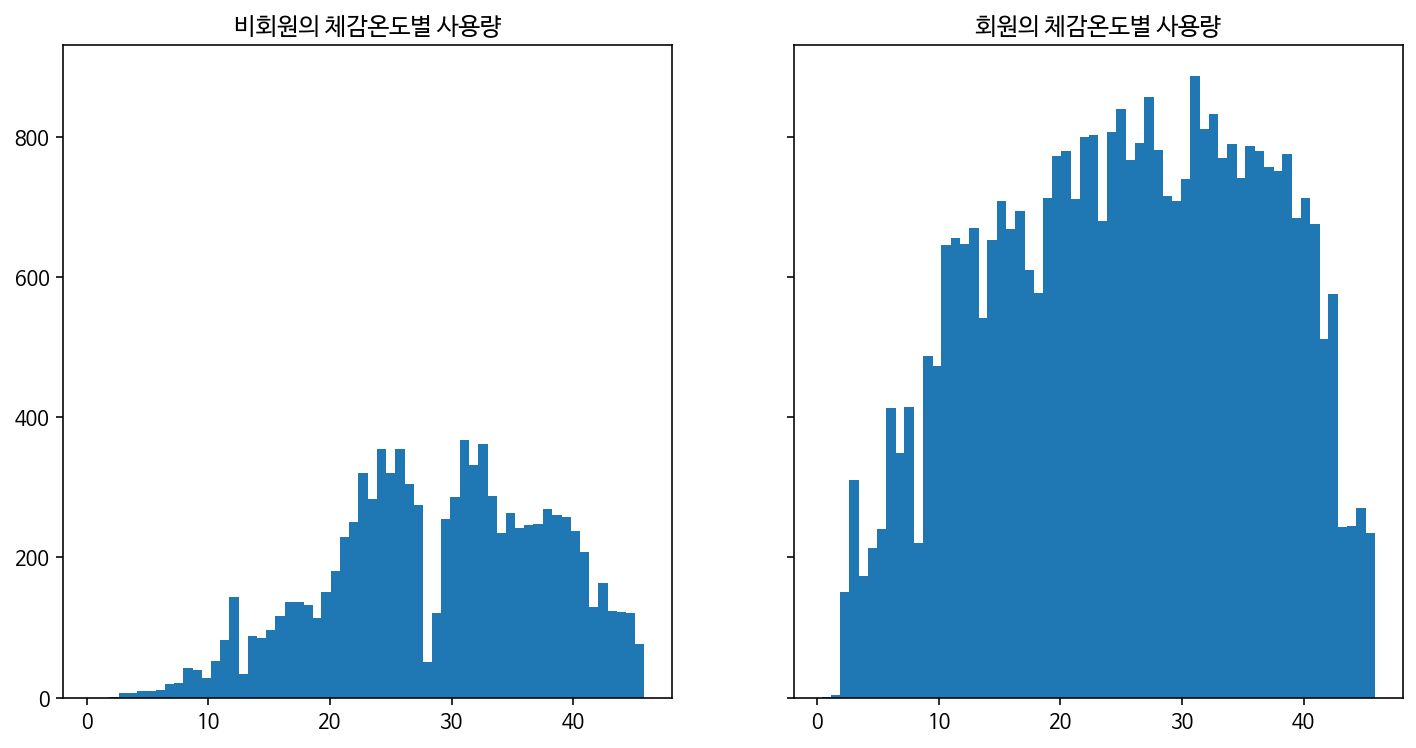

In [ ]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 10], data[:, -3])
axes[0].set_title('비회원의 체감온도별 사용량')

axes[1].bar(data[:, 10], data[:, -2])
axes[1].set_title('회원의 체감온도별 사용량')
plt.show()

* 비회원은 체감온도 20~40도 사이에 사용량이 많고
* 회원은 체감온도 0도에 가까울 때와 40도에 가까울 때 를 제외하고 일정량 이상의 사용량이 보인다. 

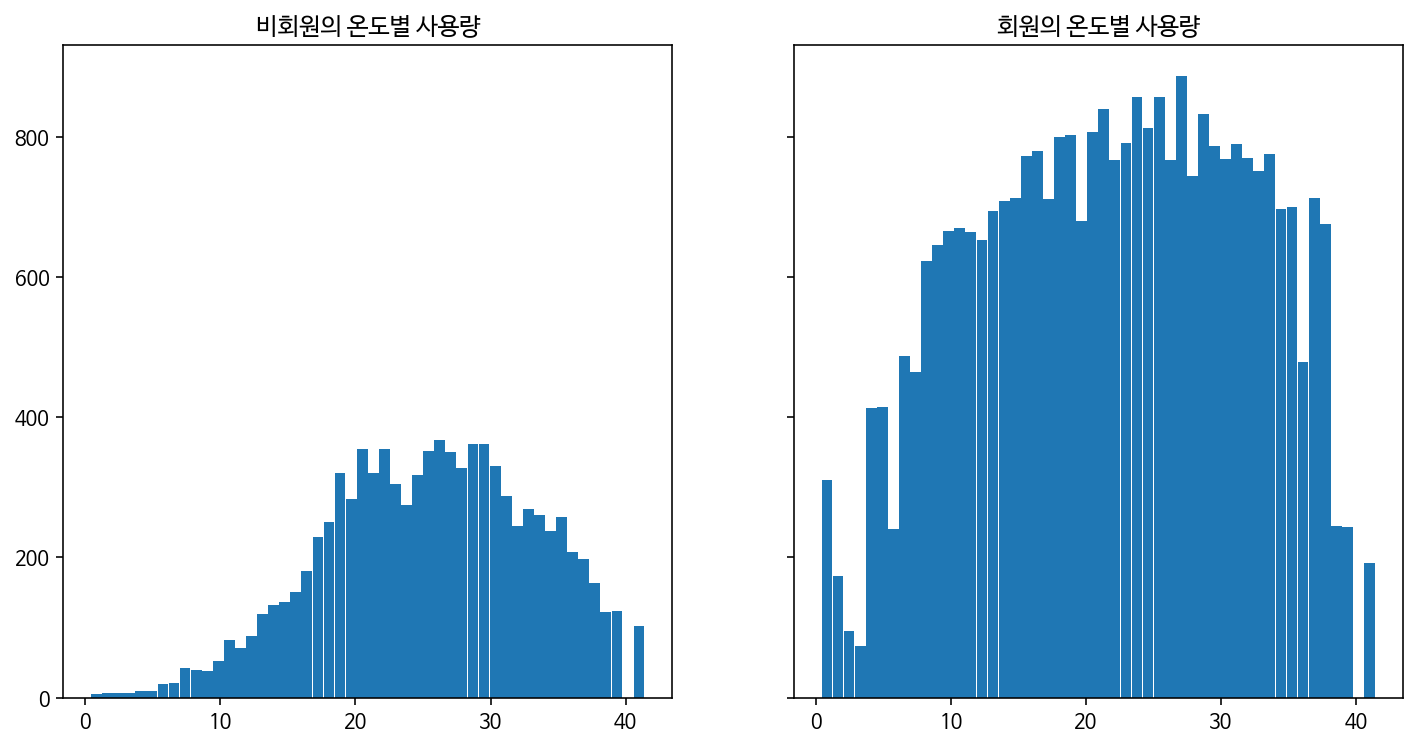

In [ ]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 9], data[:, -3])
axes[0].set_title('비회원의 온도별 사용량')

axes[1].bar(data[:, 9], data[:, -2])
axes[1].set_title('회원의 온도별 사용량')
plt.show()

* 위의 체감온도와 비슷한 양상을 띄고 있다.

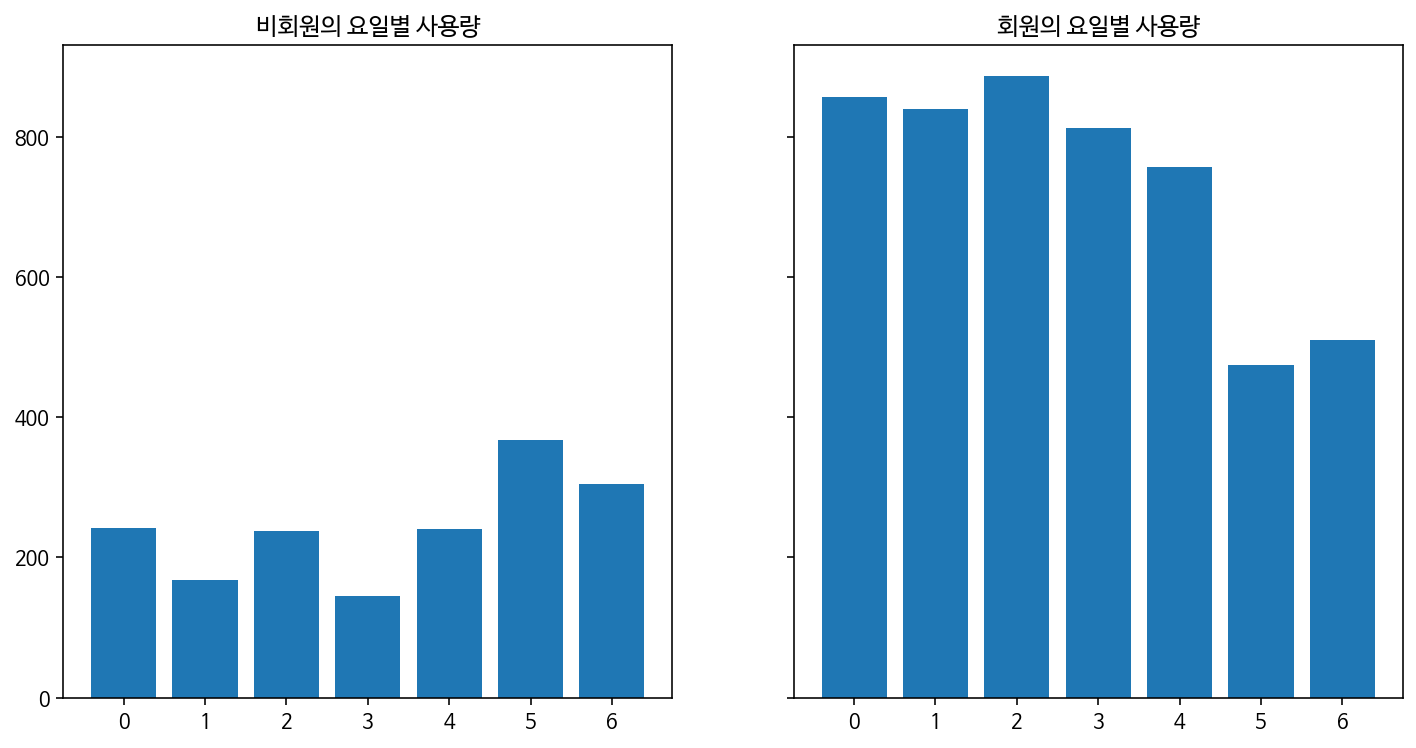

In [ ]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 4], data[:, -3])
axes[0].set_title('비회원의 요일별 사용량')

axes[1].bar(data[:, 4], data[:, -2])
axes[1].set_title('회원의 요일별 사용량')

plt.show()

* 비회원의 경우 토요일과 일요일에 평일보다 높은 추세를 보이고 있다.
* 회원의 경우 토요일과 일요일 보다는 평일에 상대적으로 사용량이 많다.

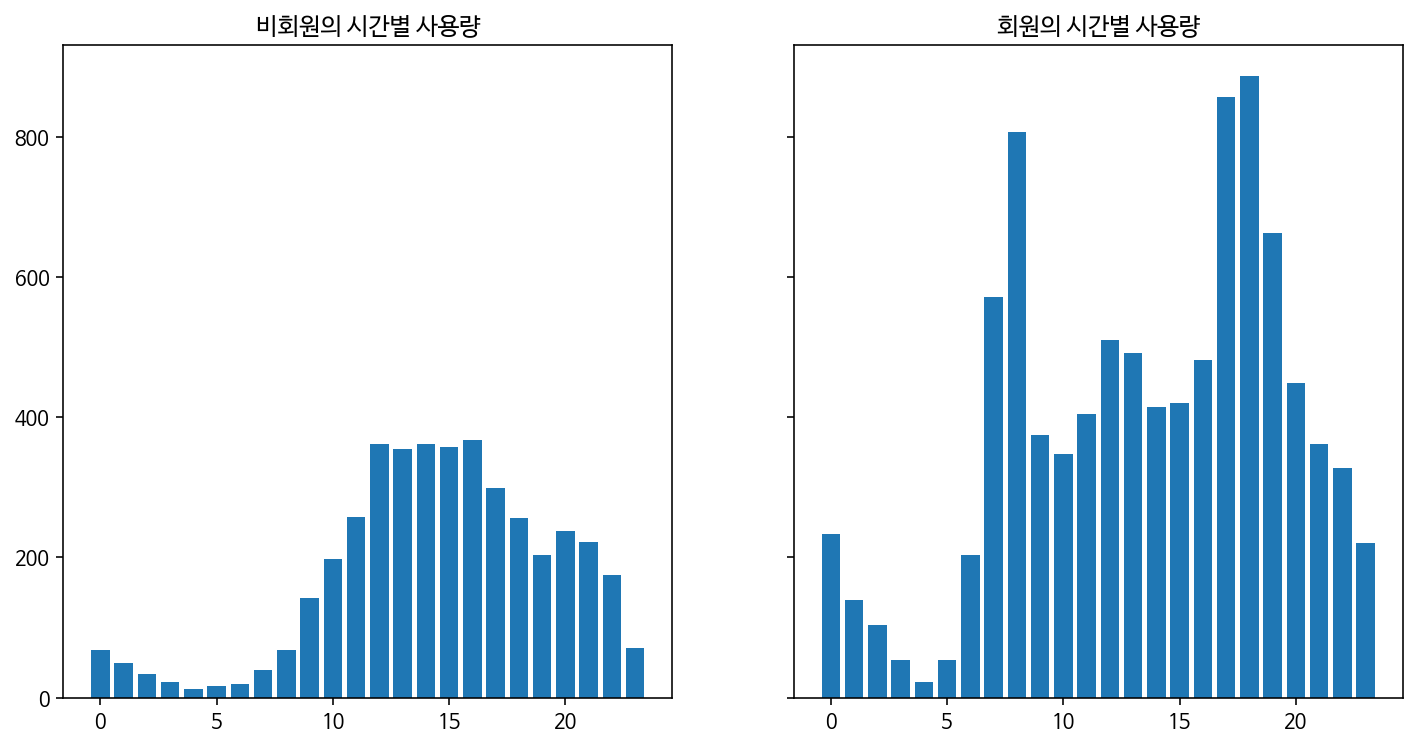

In [ ]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 3], data[:, -3])
axes[0].set_title('비회원의 시간별 사용량')

axes[1].bar(data[:, 3], data[:, -2])
axes[1].set_title('회원의 시간별 사용량')
plt.show()

* 비회원 경우 11시부터 4시까지 사용량이 다른시간대와 비교했을 때 많은 것을 볼 수 있다.
* 회원의 경우 출퇴근 시간에 사용량이 급증한 것을 볼 수있다.


# 결론
> 자전거를 타기 적당한 날씨인 봄과 가을에도 회원 사용량이 더 많았다.
그렇지만 각 데이터의 비율만 생각했을 때 비회원의 봄, 가을에 사용량이 다른 시기보다 사용량이 더 많은 것을 볼 수 있다.  

* 회원이 비회원보다 사용량이 더 많다.
* 비회원은 자전거를 타기 적당한 20~30도 사이에 사용량이 많고 해당 온도의 봄과 가을에 사용량이 높게 나타났다.
* 비회원은 평일보다는 주말에 사용자가 많고 이용시간대는 12 - 17시에 사용자가 많다.
* 회원의 경우 출퇴근시간사용자가 많고 평일이 주말보다 사용자가 많은 것을 보면 직장인이 많이 등록했다라고 볼 수 있다.

# 전처리 과정
* 불필요한 데이터 삭제
  * 년도, 일, 비회원, 회원(머신러닝에서 타겟이 총이용자 수이므로 삭제), 풍속
* 원핫인코딩이 필요한 데이터
  * 요일, 계절 

In [ ]:
불필요한 데이터 삭제

# Train Set, Test Set 나누기

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data[:, :-1], 
    data[:, -1], 
    random_state=42
    # stratify=data[:, 1]
)

In [ ]:
x_train.shape, y_train.shape

((8164, 15), (8164,))

In [ ]:
x_test.shape, y_test.shape

((2722, 15), (2722,))

In [ ]:
data

array([[2011, 1, 1, ..., 3, 13, 16],
       [2011, 1, 1, ..., 8, 32, 40],
       [2011, 1, 1, ..., 5, 27, 32],
       ...,
       [2012, 12, 19, ..., 4, 164, 168],
       [2012, 12, 19, ..., 12, 117, 129],
       [2012, 12, 19, ..., 4, 84, 88]], dtype=object)

# 모델 선정 및 훈련

## 선형회귀 알고리즘 사용

In [ ]:
from sklearn.linear_model import LinearRegression
 
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.predict(x_test)

array([127.,  13., 163., ...,  26., 127.,  84.])

In [ ]:
lin_reg.score(x_test, y_test)

1.0

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()

# x_train_minmax_scaled = min_max_scaler.fit_transform(x_train)

In [ ]:
# lin_reg.fit(x_train_minmax_scaled, y_train)

In [ ]:
# lin_reg.predict(x_test)

In [ ]:
# lin_reg.score(x_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scalered = scaler.fit_transform(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lin_reg.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.predict(x_test_scaled)

array([127.,  13., 163., ...,  26., 127.,  84.])

In [ ]:
lin_reg.score(x_test_scaled, y_test)

1.0

선형회귀 결과....  
> 과대적합되었다..
어디서 잘못된건지 모르겠다.  

-> 규제를 해보다...?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()
def mse_eval(name_, pred, actual):
    global predictions
    global colors
    plot_predictions(name_, pred, actual)
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    length = len(df)
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    plt.show()
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ratios = [0.2, 0.5, 0.8]

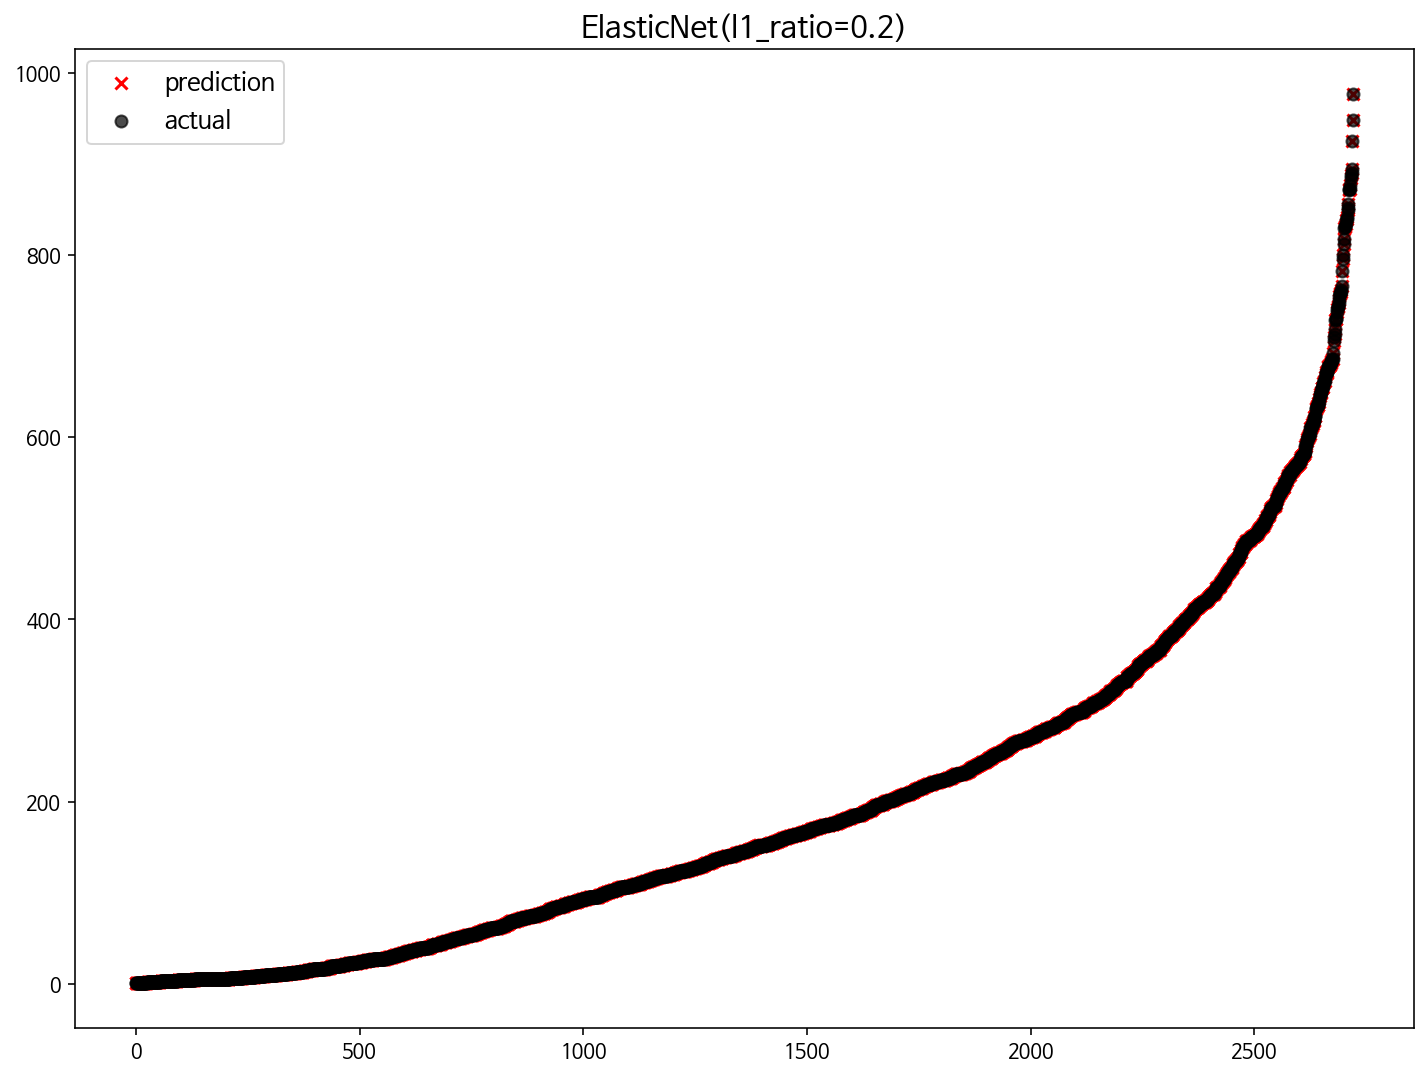

NameError: ignored

In [ ]:
for ratio in ratios:
    elastic_net = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elastic_net.fit(x_train, y_train)

    pred_elastic = elastic_net.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred_elastic, y_test)